# Exploratory analysis

In [1]:
# pandas - pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
import pandas as pd

# matplotlib - A comprehensive library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

## Exploration and Preparation of the Dataset

Pandas allows us to transform our dataset into a dataframe, which transforms the data into a structure of 2 dimensions, rows and columns, below we can visualize the data in the form of a table.

### Columns
- **job_id** - Unique Job ID
- **title** - The title of the job ad entry.
- **location** - Geographical location of the job ad.
- **department** - Corporate department (e.g. sales).
- **salary_range** - Indicative salary range (e.g. \$50,000-\$60,000)
- **company_profile** - A brief company description.
- **description** - The details description of the job ad.
- **requirements** - Enlisted requirements for the job opening.
- **benefits** - Enlisted offered benefits by the employer.
- **telecommuting** - True for telecommuting positions.
- **has_company_logo** - True if company logo is present.
- **has_questions** - True if screening questions are present.
- **employment_type** - Full-type, Part-time, Contract, etc.
- **required_experience** - Executive, Entry level, Intern, etc.
- **required_education** - Doctorate, Master’s Degree, Bachelor, etc.
- **industry** - Automotive, IT, Health care, Real estate, etc.
- **function** - Consulting, Engineering, Research, Sales etc.
- **fraudulent** - target - Classification attribute.

In [2]:
path = "../src/dataset/fake_job_postings.csv"
index_column = "job_id"

df = pd.read_csv(path, index_col=index_column)

In [3]:
df.shape

(17880, 17)

In [4]:
categories = {
    "telecommuting": ["no", "yes"],
    "has_company_logo": ["no", "yes"],
    "has_questions": ["no", "yes"],
    "fraudulent": ["no", "yes"]
}

for column, column_categories in categories.items():
    df[column] = df[column].astype("category")
    df[column].cat.categories = column_categories


## Fill empty values

A very common problem that we encounter when working with large data sets is the existence of null or unfilled values, which can exist due to filling errors, errors in the import and transformation of the data, non-existence of the information, or any other reason.

The treatment that will be for the null values depends on our objective with the data analysis. We can leave the values null if they do not negatively impact our analysis. We can delete the entire line that has a null value. We can even fill in the null values with a specific value. In this context, there are countless ways to treat null values, but we must always keep our objective in mind when analyzing data to decide which approach to use.

We will analyze the null values of each column and create a strategy of which variables we will keep null and which ones we will fill with values.


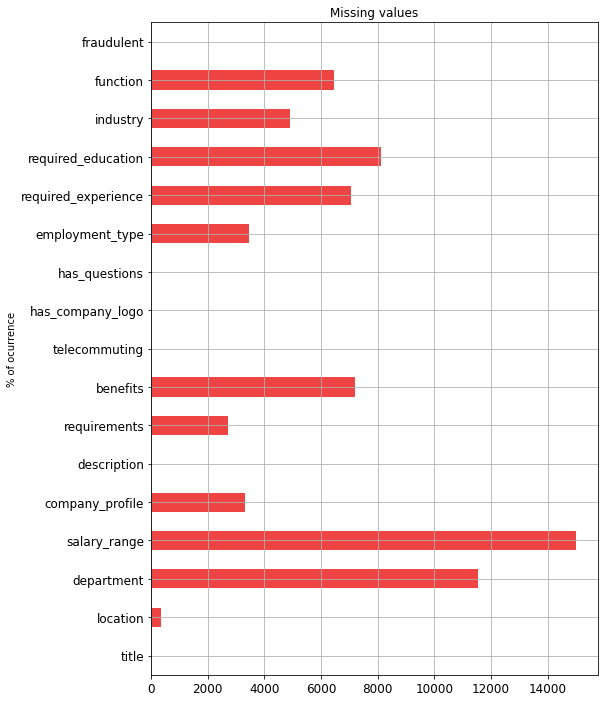

In [5]:
missing_counts = df.isnull().sum()

plt.figure(figsize=(8, 12))
missing_counts.plot(title="Missing values", kind="barh", color="#E44", grid=True, fontsize="12")
plt.ylabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/missing_values.png", dpi=300)
plt.show()

In [6]:
del df["salary_range"]

for column_name in df.columns:
    column = df[column_name]

    if not str(column.dtype) == "category":
        df[column_name] = df[column_name].fillna("Missing")


In [7]:
df

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Missing,no,yes,no,Other,Internship,Missing,Missing,Marketing,no
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,no,yes,no,Full-time,Not Applicable,Missing,Marketing and Advertising,Customer Service,no
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Missing,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Missing,no,yes,no,Missing,Missing,Missing,Missing,Missing,no
4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,no,yes,no,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,no
5,Bill Review Manager,"US, FL, Fort Worth",Missing,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,no,yes,yes,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,no,yes,yes,Full-time,Mid-Senior level,Missing,Computer Software,Sales,no
17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,no,yes,yes,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,no
17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Missing,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,Missing,no,no,no,Full-time,Missing,Missing,Missing,Missing,no


## Analisys

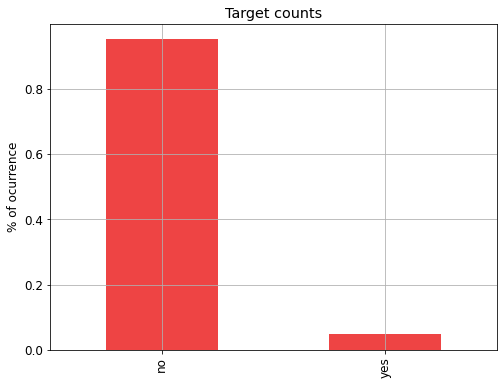

In [8]:
fraudulent_counts = df["fraudulent"].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
fraudulent_counts.plot(title="Target counts", kind="bar", color="#E44", grid=True, fontsize="12")
plt.ylabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/target_counts.png", dpi=300)
plt.show()


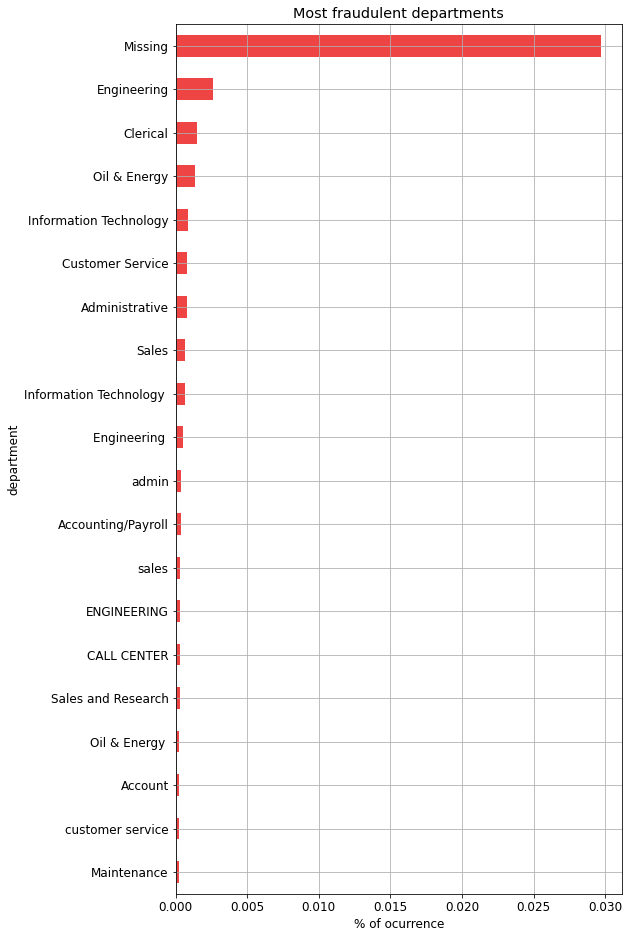

In [9]:
department_cross = pd.crosstab(df["department"], df["fraudulent"], normalize=True)
department_cross_filtered = department_cross["yes"].sort_values(ascending=False).iloc[0:20]

plt.figure(figsize=(8, 16))
department_cross_filtered.plot(title="Most fraudulent departments", kind="barh", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.gca().invert_yaxis()
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_job_departments.png", dpi=300)
plt.show()


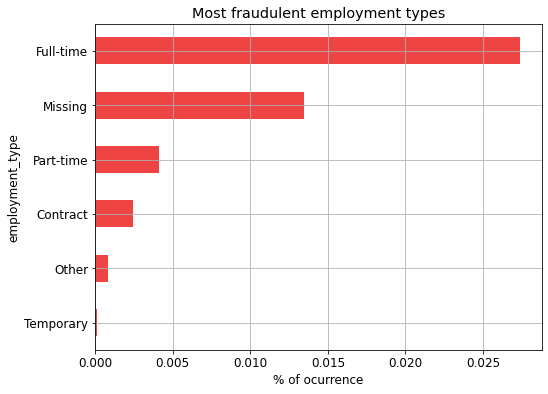

In [10]:
employment_type_cross = pd.crosstab(df["employment_type"], df["fraudulent"], normalize=True)
employment_type_cross_filtered = employment_type_cross["yes"].sort_values()

plt.figure(figsize=(8, 6))
employment_type_cross_filtered.plot(title="Most fraudulent employment types", kind="barh", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_employment_types.png", dpi=300)
plt.show()


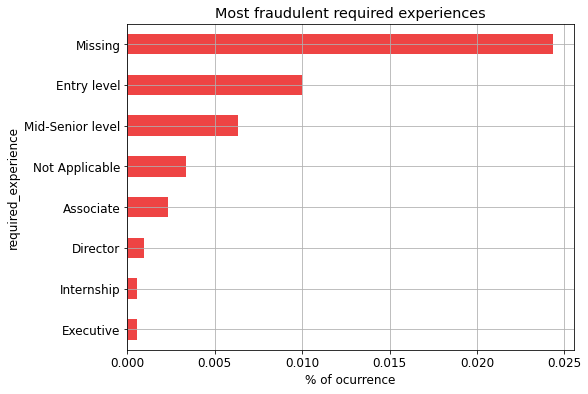

In [11]:
required_experience_cross = pd.crosstab(df["required_experience"], df["fraudulent"], normalize=True)
required_experience_cross_filtered = required_experience_cross["yes"].sort_values()

plt.figure(figsize=(8, 6))
required_experience_cross_filtered.plot(title="Most fraudulent required experiences", kind="barh", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_required_experience.png", dpi=300)
plt.show()


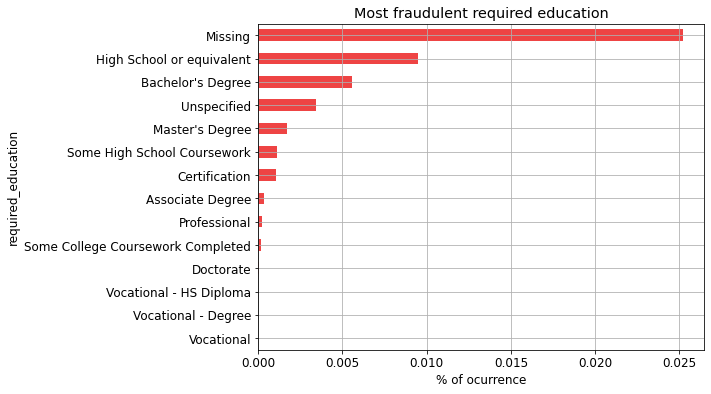

In [12]:
required_education_cross = pd.crosstab(df["required_education"], df["fraudulent"], normalize=True)
required_education_cross_filtered = required_education_cross["yes"].sort_values()

plt.figure(figsize=(8, 6))
required_education_cross_filtered.plot(title="Most fraudulent required education", kind="barh", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_required_education.png", dpi=300)
plt.show()


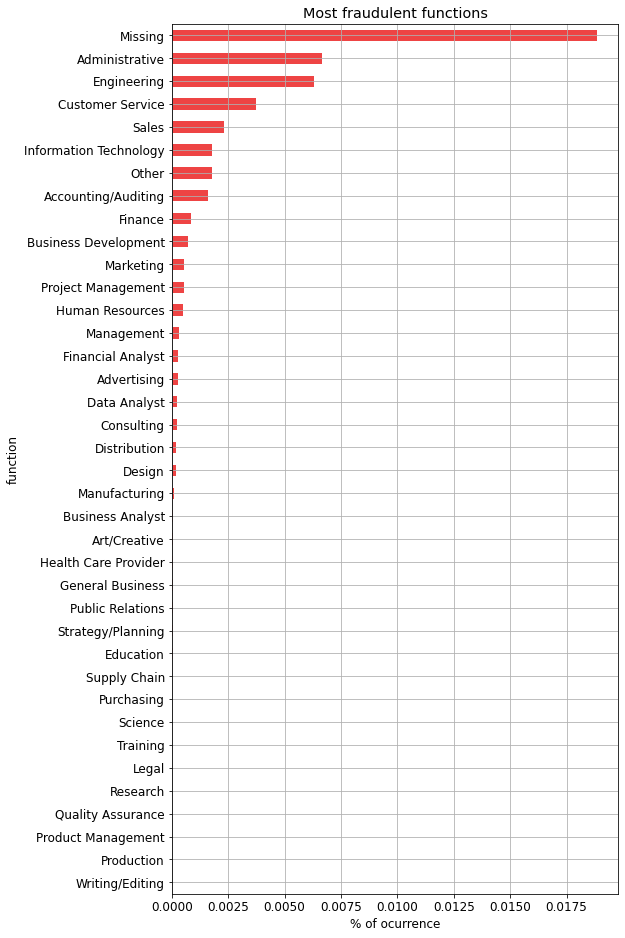

In [13]:
function_cross = pd.crosstab(df["function"], df["fraudulent"], normalize=True)
function_cross_filtered = function_cross["yes"].sort_values()

plt.figure(figsize=(8, 16))
function_cross_filtered.plot(title="Most fraudulent functions", kind="barh", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_functions.png", dpi=300)
plt.show()


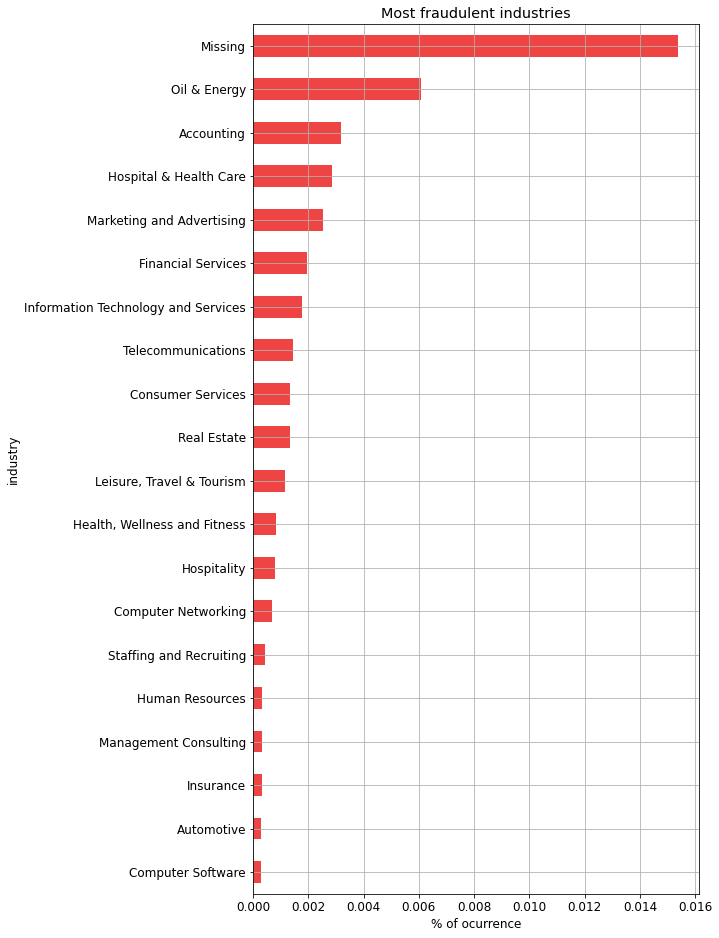

In [14]:
industry_cross = pd.crosstab(df["industry"], df["fraudulent"], normalize=True)
industry_cross_filtered = industry_cross["yes"].sort_values(ascending=False).iloc[0:20]

plt.figure(figsize=(8, 16))
industry_cross_filtered.plot(title="Most fraudulent industries", kind="barh", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.gca().invert_yaxis()
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_industries.png", dpi=300)
plt.show()